In [4]:
# Notebook for noodling with the bullet gym walker environments
# Implementation: https://github.com/bulletphysics/bullet3/blob/master/examples/pybullet/gym/pybullet_envs/robot_locomotors.py

import pybullet
import pybullet_envs
import gym
import numpy as np
import matplotlib.pyplot as plt

#env = gym.make('HumanoidBulletEnv-v0')
env = gym.make("Walker2dBulletEnv-v0")
#env.render(mode="human")
obs = env.reset()
base_env = env.unwrapped

UnregisteredEnv: No registered env with id: Walker2dBulletEnv-v0

In [2]:
# The goal here is to find a mirroring function for both our state and action space. 
# Going to start with the Walker2d environment, though getting a general solution for the pybullet locomotion envs would be ideal

def mirror_obs(obs):
    return obs

def mirror_act(act):
    return act

# What's actually in each space?
## Mujoco's Walker2d has an observation space of Box(17,), But bullet has Box(22,)
# from line 75 https://github.com/bulletphysics/bullet3/blob/master/examples/pybullet/gym/pybullet_envs/robot_locomotors.py
#
# state = np.clip(np.concatenate([more] + [j] + [self.feet_contact]), -5, +5)
#
#  more = np.array(
#        [
#            z - self.initial_z,
#            np.sin(angle_to_target),
#            np.cos(angle_to_target),
#            0.3 * vx,
#            0.3 * vy,
#            0.3 * vz,  # 0.3 is just scaling typical speed into -1..+1, no physical sense here
#            r,
#            p
#        ],
# 
# j is the relative joint positions
# j = np.array([j.current_relative_position() for j in self.ordered_joints],
#               dtype=np.float32).flatten()
#
# feet contact just tell us which foot is in contact with the ground
# env.robot.feet_contact

act = env.action_space.sample()
obs, reward, done, _ = env.step(act)

print("Before Mirror")
print(act)
print(obs)
env.render()


print("After Mirror")
m_obs = mirror_obs(obs)
m_act = mirror_act(act)
print(m_act)
print(m_obs)
env.render()

Before Mirror
[-0.00356606 -0.41212827  0.71329635 -0.25810382  0.08629391 -0.35700336]
[-1.0204307e-03  0.0000000e+00  1.0000000e+00 -3.1553440e-02
  0.0000000e+00 -5.0847944e-02  0.0000000e+00 -5.2675437e-03
  9.9104518e-01  1.5494381e-02  1.0206424e+00 -2.4678069e-01
  1.5400402e-01  3.1354350e-01  9.5253438e-01 -1.5943551e-01
  9.3681628e-01  1.4231138e-01  6.0307670e-02 -1.4122784e-01
  0.0000000e+00  0.0000000e+00]
After Mirror
[-0.00356606 -0.41212827  0.71329635 -0.25810382  0.08629391 -0.35700336]
[-1.0204307e-03  0.0000000e+00  1.0000000e+00 -3.1553440e-02
  0.0000000e+00 -5.0847944e-02  0.0000000e+00 -5.2675437e-03
  9.9104518e-01  1.5494381e-02  1.0206424e+00 -2.4678069e-01
  1.5400402e-01  3.1354350e-01  9.5253438e-01 -1.5943551e-01
  9.3681628e-01  1.4231138e-01  6.0307670e-02 -1.4122784e-01
  0.0000000e+00  0.0000000e+00]


array([], dtype=float64)

In [25]:
# mess with the joint angles here


# I've only found a way to directly set the absolute angles, the state variables are relative joint angles
joint_angles = [1,-2,0,0,0,0]
base_env.reset()
for j,s in zip(base_env.ordered_joints, joint_angles):
    j.reset_position(s,0)

print("absolute (position, velocity)")
for j,s in zip(base_env.ordered_joints, joint_angles):
    print(j.current_position())

print(); print();
    
print("relative (position, velocity)")
for j,s in zip(base_env.ordered_joints, joint_angles):
    print(j.current_relative_position())
    

env.render()

# we can go through and set the actions like the above, but probably better to use the high level gym interface (see next cell)
#joint_torques = [0,0,0,1,0,0]
#for j,a in zip(base_env.ordered_joints, joint_torques):
#    j.set_motor_torque(a)


absolute (position, velocity)
(1.0, 0.0)
(-2.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)


relative (position, velocity)
(1.763943670796563, 0.0)
(-0.527887341593126, 0.0)
(0.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(0.0, 0.0)


array([], dtype=float64)

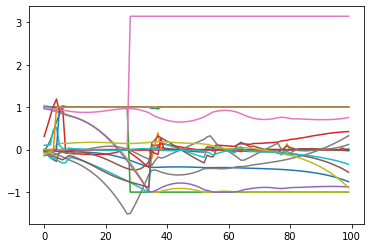

In [6]:
# mess with the actions here

actions = np.array([0,1,1,0,0,0])

state_hist = []
action_hist = []

env.reset()
for _ in range(100):
    obs, reward, done, _ = env.step(actions)
    state_hist.append(obs)
    env.render()
    
plt.plot(state_hist)
    